In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, json, math
import pandas as pd
import numpy as np

## Bench Select


In [32]:
path = "../target/criterion/select/"
benches_list = []

for dir in os.listdir(path):
    if not os.path.isdir(path + dir):
        continue

    run_name = dir.split("_")
    data = {}
    
    data["inv"] = int(run_name[0], 10)
    data["sub"] = int(run_name[1], 10)
    data["size"] = int(run_name[2], 10)
    data["dense"] = float(run_name[3])
    data["rep"] = int(run_name[4], 10)
    
    # get the path of the file
    path = path + dir + "/new/estimates.json"
    with open(path, "r") as f:
        estimates = json.load(f)
        data["mean"] = estimates["mean"]["point_estimate"]
    
    benches_list.append(data)

benches_df = pd.DataFrame(benches_list)
benches_df = benches_df.groupby(["inv", "sub", "size", "dense"], as_index=False)["mean"].mean()
benches_df = benches_df.sort_values(by="size", ignore_index=True)

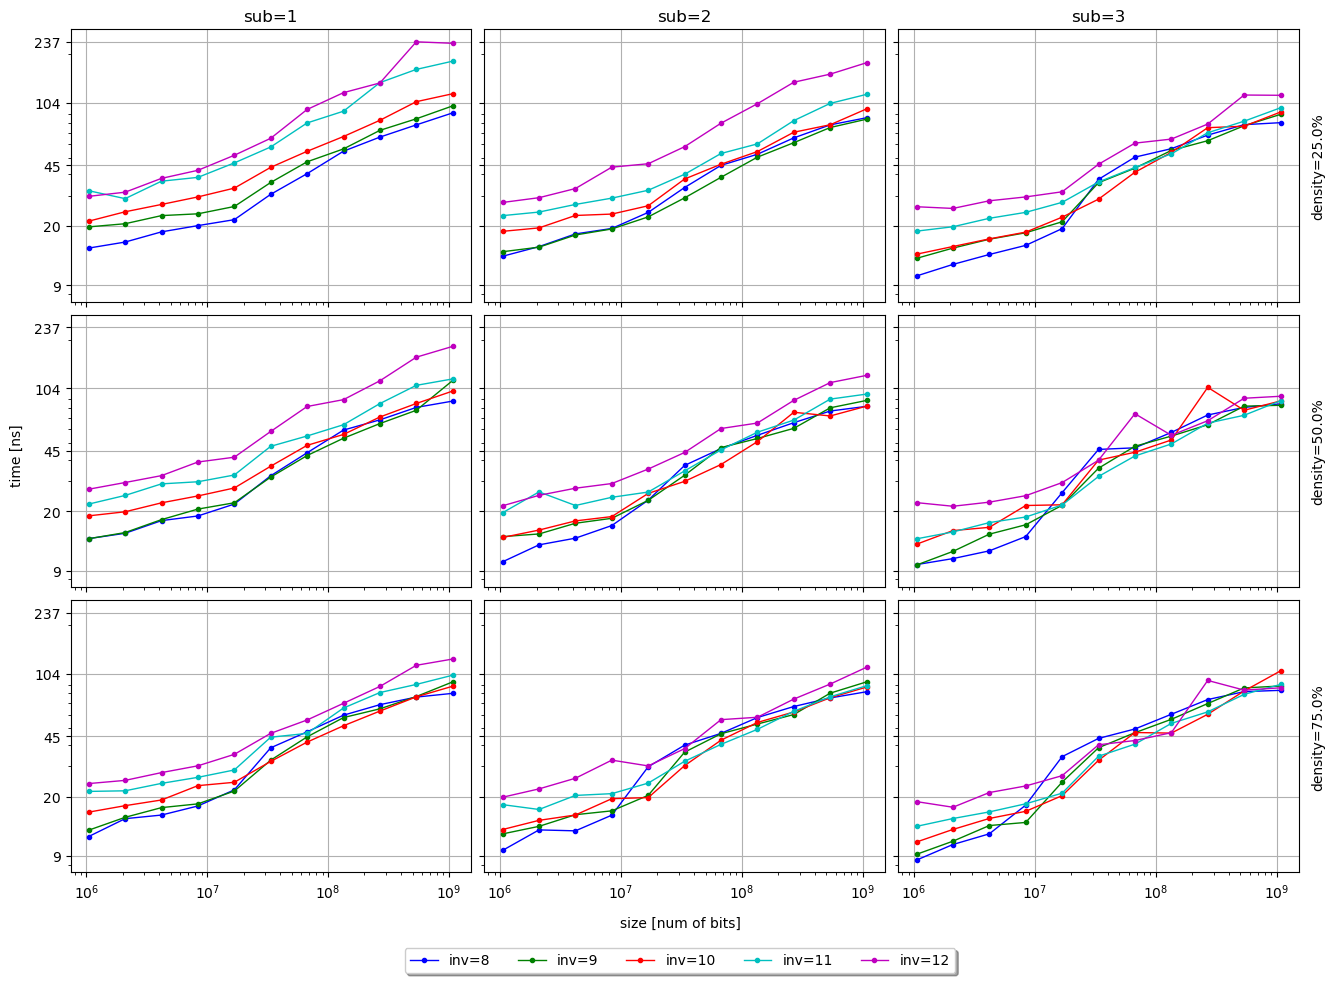

In [33]:
colors = ['b','g','r','c','m']

num_of_densities = len(benches_df["dense"].unique())
num_of_sub_sizes = len(benches_df["sub"].unique())

fig, ax = plt.subplots(num_of_sub_sizes, num_of_densities, constrained_layout=True, sharex=True, sharey=True, squeeze=False)
fig.set_size_inches(13, 9)
fig.text(0.5, -0.02, 'size [num of bits]', ha='center', va='center')
fig.text(-0.01, 0.5, 'time [ns]', ha='center', va='center', rotation='vertical')


for i, (name, group) in enumerate(benches_df.groupby(["dense"])):
    for j, (name1, group1) in enumerate(group.groupby(["inv"])): 
        for k, (name2, group2) in enumerate(group1.groupby(["sub"])):
            ax[i, k].plot(group2["size"], group2["mean"], label=f"inv={name1[0]}", 
                          color=colors[j], marker="o", markersize=3, linewidth=1.0)
            ax[i, k].grid(True)
            
            ax[0, k].set_title(f"sub={name2[0]}")
        
    ax[i, num_of_densities-1].text(1.05, 0.5, f"density={float(name[0])*100}%", ha='center', 
                                   va='center', rotation='vertical', transform=ax[i, num_of_densities-1].transAxes)    

ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")

means = np.sort(benches_df["mean"].unique())
ticks = np.logspace(np.log10(means[0]), np.log10(means[-1]), num=5)
ticks = list(map(lambda x: math.ceil(x), ticks))
ax[0,0].set_yticks(ticks)
ax[0,0].set_yticklabels(ticks)

h1, l1 = ax[0, 0].get_legend_handles_labels()
fig.legend(handles=h1, loc='upper center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncol=5)

plt.show()

## Bench Rank


In [9]:
def load_rank_benches(base_path):
    benches_list = []

    for dir in os.listdir(base_path):
        if not os.path.isdir(base_path + dir):
            continue

        run_name = dir.split("_")
        data = {}

        data["size"] = int(run_name[0], 10)
        data["dense"] = float(run_name[1])
        data["rep"] = int(run_name[2], 10)
        
        # get the path of the file
        path = base_path + dir + "/new/estimates.json"
        with open(path, "r") as f:
            estimates = json.load(f)
            data["mean"] = estimates["mean"]["point_estimate"]
        
        benches_list.append(data)

    benches_df = pd.DataFrame(benches_list)
    benches_df = benches_df.groupby(["size", "dense"], as_index=False)["mean"].mean()
    benches_df = benches_df.sort_values(by="size", ignore_index=True)
    return benches_df

In [10]:
rank9_benches = load_rank_benches("../target/criterion/rank9/")
rank11_benches = load_rank_benches("../target/criterion/rank11/")

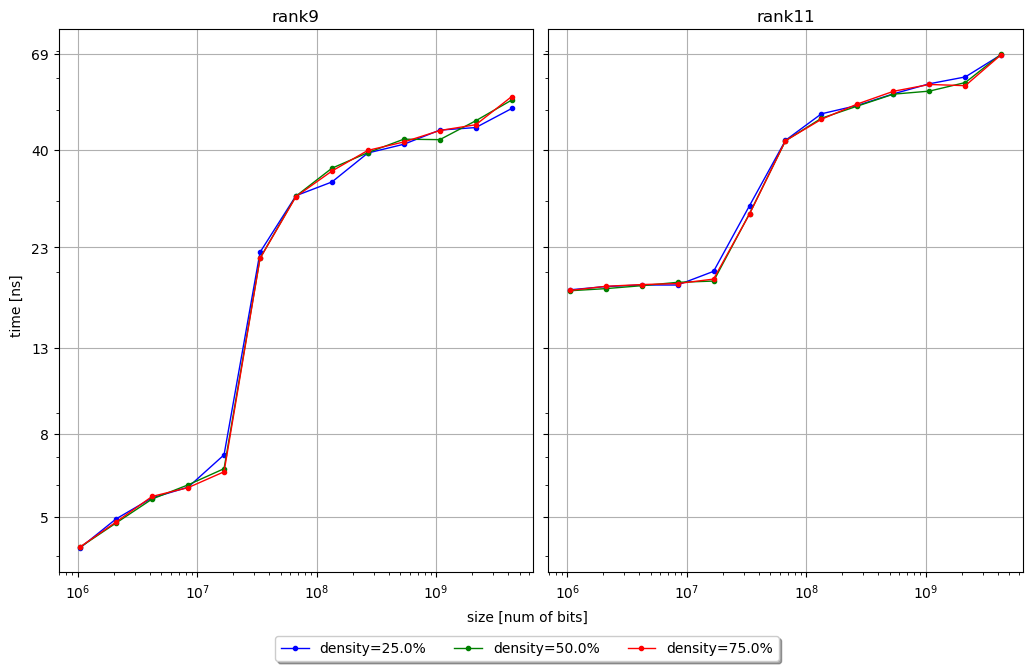

In [11]:
colors = ['b','g','r','c','m']

num_of_densities = 3

fig, ax = plt.subplots(1, 2, constrained_layout=True, sharex=True, sharey=True, squeeze=False)
fig.set_size_inches(10, 6)
fig.text(0.5, -0.02, 'size [num of bits]', ha='center', va='center')
fig.text(-0.01, 0.5, 'time [ns]', ha='center', va='center', rotation='vertical')


for i, (name, group) in enumerate(rank9_benches.groupby(["dense"])):
    ax[0,0].plot(group["size"], group["mean"], label=f"density={float(name[0])*100}%", 
                    color=colors[i], marker="o", markersize=3, linewidth=1.0)
ax[0,0].set_title("rank9")
ax[0,0].grid(True)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")

for i, (name, group) in enumerate(rank11_benches.groupby(["dense"])):
    ax[0,1].plot(group["size"], group["mean"], label=f"density={float(name[0])*100}%", 
                    color=colors[i], marker="o", markersize=3, linewidth=1.0)
ax[0,1].set_title("rank11")
ax[0,1].grid(True)
ax[0,1].set_xscale("log")
ax[0,1].set_yscale("log")

means = np.sort(np.concatenate((rank9_benches["mean"].unique(), rank11_benches["mean"].unique()), axis=0))
ticks = np.logspace(np.log10(means[0]), np.log10(means[-1]), num=6)
ticks = list(map(lambda x: math.ceil(x), ticks))
ax[0,0].set_yticks(ticks)
ax[0,0].set_yticklabels(ticks)

h1, l1 = ax[0,0].get_legend_handles_labels()
fig.legend(handles=h1, loc='upper center', bbox_to_anchor=(0.5, -0.04), fancybox=True, shadow=True, ncol=5)

plt.show()